In [134]:
import numpy as np
import pandas as pd 
import re
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import math
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_recall_fscore_support as score

In [135]:
#f1 = open('/Users/ashish/Deep_Learning/svnh_proj/preprocessing/testImageInfoWithImageName.txt','r')
#digit_df= pd.DataFrame([],columns=['filename','label','Aleft','Atop','Awidth','Aheight'])
#i= 0;
#for line in f1:
#     data1= pd.DataFrame([],columns=['filename','label','Aleft','Atop','Awidth','Aheight']) 
#     filename= line.split()[0]
#     label= line.split()[0]
#     Aleft= line.split()[1]
#     Atop= line.split()[2]
#     Awidth= line.split()[3]   
#     Aheight= line.split()[4]       
#     data1 = pd.DataFrame([{'filename':filename,'label':label,'Aleft':Aleft,'Atop':Atop,'Awidth':Awidth,'Aheight':Aheight}])
#     digit_df=digit_df.append(data1,ignore_index=True)  
#     if i > 10000:
#         break; 
#f1.close()

In [153]:
yolo_out = pd.read_csv('/Users/ashish/Deep_Learning/svnh_proj/outputs/yolo_out4.txt',sep=',',header=0) 
digit_df= pd.read_csv('/Users/ashish/Deep_Learning/svnh_proj/outputs/extra_out_digitStruct2.txt',sep=',',header=0)
yolo_out.count()
yolo_out.head()
digit_df.count()

Aheight     531131
Aleft       531131
Atop        531131
Awidth      531131
filename    531131
labels      531131
dtype: int64

In [154]:
digit_df['rowid'] = digit_df.groupby(['filename']).cumcount()+1
yolo_out['rowid'] = yolo_out.groupby(['filename']).cumcount()+1

In [155]:
def cal_Iou(row):
    Ax1= int(row.Aleft)
    Ay1= int(row.Atop)
    Ax2=int(row.Aleft+row.Awidth) 
    Ay2= int(row.Atop+row.Aheight)
    if math.isnan(row.left):
        row.left = float(-1.0)
    if math.isnan(row.top):
        row.top = float(-1.0)    
    if math.isnan(row.width):
        row.width = float(0.0)
    if math.isnan(row.height):
        row.height = float(0.0)     
    Px1= int(row.left) 
    Py1= int(row.top)
    Px2= int(row.left+row.width)
    Py2= int(row.top+row.height)
    xA = max(Ax1, Px1)
    yA = max(Ay1, Py1)
    xB = min(Ax2, Px2)
    yB = min(Ay2, Py2)
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (Ax2 - Ax1 + 1) * (Ay2 - Ay1 + 1)
    boxBArea = (Px2 - Px1 + 1) * (Py2 - Py1 + 1)
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
   #print(iou)
    return iou

In [180]:
digit_df.loc[digit_df.labels == 10, ['labels']] = 0 
digit_df.labels.astype(int)
digit_df.head(20)
yolo_out.head(20)
join_df = pd.merge(digit_df,yolo_out,on=['filename','rowid'],how='left')
#join_df= join_df.drop(['rowid'],axis=1)
join_df['Iou'] = join_df.apply(cal_Iou,axis=1)
#join_df= digit_df.join(yolo_out.set_index('filename'),on=filename,how='left',rsuffix="pred",sort=True)
print(join_df.count())
join_df.head(20)


Aheight     531131
Aleft       531131
Atop        531131
Awidth      531131
filename    531131
labels      531131
rowid       531131
height      518620
left        512978
num         525343
percent     525343
top         524550
width       524377
Iou         531131
dtype: int64


,Aheight,Aleft,Atop,Awidth,filename,labels,rowid,height,left,num,percent,top,width,Iou
0,56,24,70,38,1.png,4.0,1,49.0,34.0,4.0,69.0,71.0,25.0,0.584795
1,56,55,41,36,1.png,7.0,2,60.0,51.0,7.0,74.0,42.0,40.0,0.816391
2,56,79,23,47,1.png,8.0,3,63.0,78.0,8.0,61.0,17.0,43.0,0.790390
3,203,32,13,94,2.png,7.0,1,NaN,25.0,7.0,86.0,27.0,NaN,0.000000
4,203,143,33,38,2.png,1.0,2,NaN,NaN,1.0,54.0,17.0,61.0,0.000000
5,63,18,5,20,3.png,1.0,1,66.0,13.0,7.0,58.0,6.0,29.0,0.651403
6,63,40,6,33,3.png,7.0,2,62.0,14.0,1.0,69.0,4.0,28.0,0.047906
7,63,72,18,34,3.png,4.0,3,74.0,40.0,7.0,98.0,3.0,33.0,0.025696
8,38,11,6,23,4.png,3.0,1,43.0,9.0,3.0,100.0,4.0,26.0,0.787879
9,38,35,6,20,4.png,0.0,2,40.0,35.0,0.0,100.0,5.0,23.0,0.832317


In [181]:
join_df.to_csv('/Users/ashish/Deep_Learning/svnh_proj/outputs/actual_pred6.txt',sep=',',header=True,index=False)

In [182]:
print(join_df.count())
join_df.groupby(['labels']).count()

join_df=join_df.fillna(0)

Aheight     531131
Aleft       531131
Atop        531131
Awidth      531131
filename    531131
labels      531131
rowid       531131
height      518620
left        512978
num         525343
percent     525343
top         524550
width       524377
Iou         531131
dtype: int64


             Iou labels
            mean       
labels                 
0.0     0.682220    0.0
1.0     0.658778    1.0
2.0     0.708513    2.0
3.0     0.700835    3.0
4.0     0.688004    4.0
5.0     0.695137    5.0
6.0     0.699015    6.0
7.0     0.686007    7.0
8.0     0.694900    8.0
9.0     0.693787    9.0


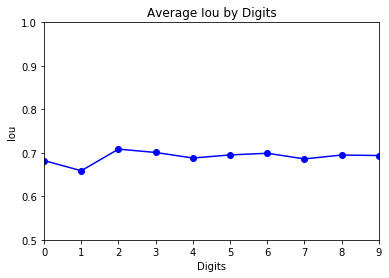

In [183]:
iou_df= join_df[['labels','Iou']].groupby(['labels']).agg(['mean'])
iou_df['labels'] = iou_df.index
plt.figure(1)
plt.xlabel('Digits')
plt.ylabel('Iou')
plt.title('Average Iou by Digits')
plt.axis([0, 9,0.5,1])
plt.plot(iou_df['labels'], iou_df['Iou'],linestyle='-', marker='o', color='b')
print(iou_df)

In [184]:
join_df['pred'] = np.where((join_df['labels'] == join_df['num']) & (join_df['Iou'] >=0.5) ,1,0)
join_df['act'] = 1
new_join_df1 = join_df[['labels','pred','act','Iou']].copy()
new_join_df1= join_df[['labels','pred','act','Iou']].groupby(['labels']).agg(['sum'])
new_join_df1.columns = ['pred','act','Iou']
new_join_df1['Nact'] = 1 
new_join_df1['Npred'] = new_join_df1['pred'].divide(new_join_df1['act'], fill_value=1)
new_join_df1.head(30)

join_df.loc[join_df['pred'] == 0].head(15)

,Aheight,Aleft,Atop,Awidth,filename,labels,rowid,height,left,num,percent,top,width,Iou,pred,act
3,203,32,13,94,2.png,7.0,1,0.0,25.0,7.0,86.0,27.0,0.0,0.000000,0,1
4,203,143,33,38,2.png,1.0,2,0.0,0.0,1.0,54.0,17.0,61.0,0.000000,0,1
5,63,18,5,20,3.png,1.0,1,66.0,13.0,7.0,58.0,6.0,29.0,0.651403,0,1
6,63,40,6,33,3.png,7.0,2,62.0,14.0,1.0,69.0,4.0,28.0,0.047906,0,1
7,63,72,18,34,3.png,4.0,3,74.0,40.0,7.0,98.0,3.0,33.0,0.025696,0,1
17,23,36,10,4,7.png,0.0,3,24.0,34.0,0.0,98.0,11.0,14.0,0.302632,0,1
35,21,10,3,4,14.png,1.0,1,26.0,7.0,1.0,93.0,2.0,9.0,0.407407,0,1
36,21,17,3,5,14.png,1.0,2,26.0,16.0,1.0,95.0,2.0,9.0,0.488889,0,1
55,82,99,9,57,20.png,9.0,3,74.0,0.0,9.0,93.0,9.0,43.0,0.000000,0,1
83,32,11,1,17,32.png,2.0,1,30.0,9.0,8.0,94.0,3.0,19.0,0.850610,0,1


,filename,rowid,Iou
202300,99951.png,1,0.663834
202295,99947.png,1,0.853994
202287,9994.png,1,0.000000
202262,99917.png,1,0.821970
202250,99906.png,1,0.768595
202244,99900.png,1,0.817955
202220,9988.png,1,0.719497
202162,99827.png,1,0.586645
202160,99825.png,1,0.805913
202149,99815.png,1,0.682171


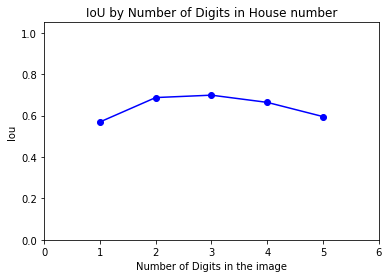

In [185]:
iou_df= join_df[['labels','Iou','filename']].groupby(['labels']).agg(['mean'])

iou_filename_df= join_df[['Iou','rowid','filename']].groupby(['filename'],as_index=False).\
agg({'rowid':'max', 'Iou': 'mean'}).sort_values(['filename'], ascending=False)

#\.rename(columns={'retweet_count':'retweetTotal','university_tweet':'UnivTweetTotal',"TweetCnt":'TweetCount'}).\
#sort_values(['TweetCount'], ascending=False)
#iou_filename_df.head(20)

iou_filename_Final = iou_filename_df[['rowid','Iou']].groupby(['rowid'],as_index=False).\
                                     agg({'Iou': 'mean'}).sort_values(['rowid'], ascending=True)
iou_filename_Final.head(10)

plt.xlabel('Number of Digits in the image')
plt.ylabel('Iou')
plt.title('IoU by Number of Digits in House number')
plt.axis([0, 6,0,1.05])
plt.plot(iou_filename_Final['rowid'], iou_filename_Final['Iou'],linestyle='-', marker='o', color='b')

#iou_filename_df.loc[iou_filename_df['rowid'] == 1].head(10)



In [191]:
digit_df[['filename','rowid']].groupby('filename').agg({'rowid':'max'}).head(10)

#iou_filename_df= join_df[['Iou','rowid','filename']].groupby(['filename'],as_index=False).\
#agg({'rowid':'max', 'Iou': 'mean'}).sort_values(['filename'], ascending=False)


#df.groupby(['Mt'], sort=False)['count'].max()

,rowid
filename,
1.png,3
10.png,3
100.png,3
1000.png,2
10000.png,3
100000.png,3
100001.png,3
100002.png,3
100003.png,3


In [187]:

target_names = ['0.0', '1.0', '2.0','3.0', '4.0', '5.0','6.0','7.0','8.0','9.0']
print(classification_report(join_df['labels'],join_df['num'], target_names=target_names, digits=6))


              precision    recall  f1-score   support

         0.0   0.854981  0.948869  0.899482     45550
         1.0   0.950925  0.951943  0.951434     90560
         2.0   0.960626  0.952529  0.956560     74740
         3.0   0.954543  0.937546  0.945968     60765
         4.0   0.963655  0.940493  0.951934     50633
         5.0   0.956605  0.937970  0.947196     53490
         6.0   0.941151  0.932278  0.936694     41582
         7.0   0.950964  0.932268  0.941523     43997
         8.0   0.927280  0.938741  0.932975     35358
         9.0   0.939938  0.931536  0.935718     34456

   micro avg   0.942244  0.942244  0.942244    531131
   macro avg   0.940067  0.940417  0.939948    531131
weighted avg   0.943213  0.942244  0.942472    531131



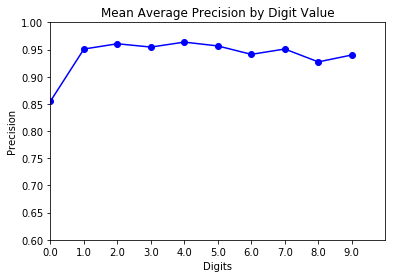

In [188]:
plt.figure(1)
plt.xlabel('Digits')
plt.ylabel('Precision')
plt.title('Mean Average Precision by Digit Value')
plt.axis([0, 10,0.6,1])

digit_prec_out_df= pd.DataFrame(target_names, [0.854981,0.950925 ,0.960626,0.954543,0.963655,0.956605,0.941151,\
                                               0.950964,0.927280,0.939938])
digit_prec_out_df['precision'] = digit_prec_out_df.index
digit_prec_out_df.reset_index(inplace=True, drop=True)
digit_prec_out_df.columns = ["labels","precision"]
digit_prec_out_df.head(10)

plt.plot(digit_prec_out_df['labels'], digit_prec_out_df['precision'],linestyle='-', marker='o', color='b')


In [172]:
new_join_df = join_df[['filename','pred','act','Iou',]].copy()
new_join_df= new_join_df[['filename','pred','act']].groupby(['filename']).agg(['sum']).astype('category')

new_join_df.columns = ['pred','act']
print(new_join_df.dtypes)
new_join_df.head(10)

pred    category
act     category
dtype: object


,pred,act
filename,,
1.png,3,3
10.png,3,3
100.png,3,3
1000.png,2,2
10000.png,3,3
100000.png,3,3
100001.png,3,3
100002.png,3,3
100003.png,3,3


In [173]:
##For single digit one by one
print(f1_score(join_df['labels'],join_df['num'],average = "weighted"))
print(precision_score(join_df['labels'],join_df['num'], average = "weighted"))
print(recall_score(join_df['labels'],join_df['num'], average = "weighted"))

0.9424720522708735
0.9432126931718153
0.9422440038333293


In [174]:
target_names = ['0 Digits', '1 Digits', '2 Digits','3 Digits', '4 Digits', '5 Digits']
print(classification_report(new_join_df['act'],new_join_df['pred'], target_names=target_names, digits=6))


              precision    recall  f1-score   support

    0 Digits   0.000000  0.000000  0.000000         0
    1 Digits   0.402797  0.724347  0.517706      9385
    2 Digits   0.830065  0.830285  0.830175     71726
    3 Digits   0.974726  0.823062  0.892497    106789
    4 Digits   0.997272  0.713837  0.832080     14338
    5 Digits   1.000000  0.504348  0.670520       115

   micro avg   0.813124  0.813124  0.813124    202353
   macro avg   0.700810  0.599313  0.623830    202353
weighted avg   0.898536  0.813124  0.848617    202353



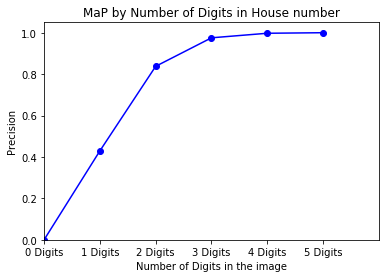

In [175]:
class_df= pd.DataFrame(target_names, [0.0000,0.402797,0.830065,0.974726,0.997272,1.0000])
class_df['precision'] = class_df.index
class_df.reset_index(inplace=True, drop=True)
class_df.columns = ["target_names","precision"]
class_df.head()
plt.xlabel('Number of Digits in the image')
plt.ylabel('Precision')
plt.title('MaP by Number of Digits in House number')
plt.axis([0, 6,0,1.05])
plt.plot(class_df['target_names'], class_df['precision'],linestyle='-', marker='o', color='b')

In [176]:
from collections import namedtuple
import numpy as np
import cv2
 
# define the `Detection` object
Detection = namedtuple("Detection", ["image_path", "gt", "pred"])

In [177]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
 
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

In [178]:
examples = []
for i in range(0,2):
    #exmp = []
    exmp = Detection(str(join_df.iloc[i,4]),[int(join_df.iloc[i,1]), int(join_df.iloc[i,2]),int(join_df.iloc[i,1]+join_df.iloc[i,3]), int(join_df.iloc[i,2]+join_df.iloc[i,0])],\
    [int(join_df.iloc[i,7]), int(join_df.iloc[i,10]),int(join_df.iloc[i,7]+join_df.iloc[i,11]), int(join_df.iloc[i,10]+join_df.iloc[i,6])])
    examples.append(exmp)

In [117]:
examples

[Detection(image_path='1.png', gt=[24, 70, 62, 126], pred=[49, 69, 120, 70]),
 Detection(image_path='1.png', gt=[55, 41, 91, 97], pred=[60, 74, 102, 76])]

In [118]:
# loop over the example detections
for detection in examples:
    # load the image
    image = cv2.imread(detection.image_path)
 
    # draw the ground-truth bounding box along with the predicted
    # bounding box
    cv2.rectangle(image, tuple(detection.gt[:2]), 
        tuple(detection.gt[2:]), (0, 255, 0), 2)
    cv2.rectangle(image, tuple(detection.pred[:2]), 
        tuple(detection.pred[2:]), (0, 0, 255), 2)
 
    # compute the intersection over union and display it
    iou = bb_intersection_over_union(detection.gt, detection.pred)
    cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    print("{}: {:.4f}".format(detection.image_path, iou))
 
    # show the output image
    cv2.imshow("Image", image)
    cv2.waitKey(33)

1.png: 0.0059
1.png: 0.0448


In [24]:
#examples2 = []
#for i in range(6,8):
    #exmp = []
#    exmp = ([int(join_df.iloc[i,1]), int(join_df.iloc[i,2]),int(join_df.iloc[i,1]+join_df.iloc[i,3]), int(join_df.iloc[i,2]+join_df.iloc[i,0])],\
 #   [int(join_df.iloc[i,7]), int(join_df.iloc[i,10]),int(join_df.iloc[i,7]+join_df.iloc[i,11]), int(join_df.iloc[i,10]+join_df.iloc[i,6])])
 #   examples2.append(exmp)

In [25]:
#examples2